In [1]:
import sys
sys.path.append('..')
import torch
from utils.utils import load_cfg_and_ckpt_path
from pathlib import Path
from streaming.b3_streamer import MultiStreamer
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

/home/cheoljun/anaconda3/envs/rnnt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## save checkpoints
'''
version_dir = '/home/cheoljun/rnnt.streaming.anyunit/outputs/2023-11-28/07-32-31/joint_hbbpe_tm1k_synth'
output_dir = Path('/home/cheoljun/rnnt.streaming.anyunit/ckpts_generic/')
output_dir.mkdir(exist_ok=True)
cfg, ckpt_path = load_cfg_and_ckpt_path(version_dir=version_dir, mode='best', term='best')
state_dict= torch.load(ckpt_path,map_location='cpu')['state_dict']
exp_name = cfg['experiment_name']


module_ckpt = {'config': cfg['model'],
               'state_dict': state_dict}
torch.save(module_ckpt, output_dir/f'{exp_name}.ckpt')
'''

"\nversion_dir = '/home/cheoljun/rnnt.streaming.anyunit/outputs/2023-11-28/07-32-31/joint_hbbpe_tm1k_synth'\noutput_dir = Path('/home/cheoljun/rnnt.streaming.anyunit/ckpts_generic/')\noutput_dir.mkdir(exist_ok=True)\ncfg, ckpt_path = load_cfg_and_ckpt_path(version_dir=version_dir, mode='best', term='best')\nstate_dict= torch.load(ckpt_path,map_location='cpu')['state_dict']\nexp_name = cfg['experiment_name']\n\n\nmodule_ckpt = {'config': cfg['model'],\n               'state_dict': state_dict}\ntorch.save(module_ckpt, output_dir/f'{exp_name}.ckpt')\n"

In [49]:
configs = {'rnnt_ckpt_path': '/home/cheoljun/rnnt.streaming.anyunit/ckpts_generic/mhv3_joint_tm1k_synthesis.ckpt',
           'streamer_configs': {
               '0':{'type': 'unit',
                    'vocoder_ckpt_path': "/data/vocoder_ckpts/vctk_hub_6-100_units2wav_duration/best_mel_ckpt.pkl",
                    'audio_sr': 16000,
                    'num_prev_unit': 16,
                    'expand_factor': 5.0,
                    'temperature': 1.0,
                    'beam_width': 20,
                    'best_n': 10,
                    'max_tokens':20,
                    'output_len': 1280},
               '1':{'type': 'text',
                    'temperature': 1.0,
                    'beam_width': 20,
                    'best_n':10,
                    'max_tokens':20,
                    'full_hypo': False,},
           },
           'context_buffer': 15,
           'device':'cuda',
           'buffer_size':16,}
            

In [52]:
multistreamer = MultiStreamer(**configs)

Loaded model parameters from /data/vocoder_ckpts/vctk_hub_6-100_units2wav_duration/best_mel_ckpt.pkl.


In [53]:
input_example='/data/common/b3_paper/packaged_data/streaming_paper_data/tm1k_mimed_slow/hgr_784_0_12594.npy'
ecog = np.load(input_example)[:]

In [54]:
multistreamer.clear_cache()
buffer_size = configs['buffer_size']
input_all = ecog

wavs = []
for i in range(0,int(len(ecog)//buffer_size*buffer_size),buffer_size):
    x = input_all[i:i+buffer_size]
    outputs = multistreamer(x)
    wav= outputs['wav']
    text=outputs['text']
    print(f'PRED[{int(1/200*i*1000):03d}ms]-', f'{abs(wav).mean():.02f}', text)
    wavs.append(wav)

# clearing buffer
wavs.append(multistreamer.streamers[0].wav_buffer)
wavs = np.concatenate(wavs)

PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PRED[1040ms]- 0.00 
PRED[1120ms]- 0.00 
PRED[1200ms]- 0.00 
PRED[1280ms]- 0.00 
PRED[1360ms]- 0.00 
PRED[1440ms]- 0.00 
PRED[1520ms]- 0.00 
PRED[1600ms]- 0.00 
PRED[1680ms]- 0.00 
PRED[1760ms]- 0.00 
PRED[1840ms]- 0.00 
PRED[1920ms]- 0.00 
PRED[2000ms]- 0.00 
PRED[2080ms]- 0.00 
PRED[2160ms]- 0.00 
PRED[2240ms]- 0.01 
PRED[2320ms]- 0.01 
PRED[2400ms]- 0.01 
PRED[2480ms]- 0.03 
PRED[2560ms]- 0.03 so
PRED[2640ms]- 0.20 so
PRED[2720ms]- 0.19 so
PRED[2800ms]- 0.19 so
PRED[2880ms]- 0.19 so
PRED[2960ms]- 0.06 so
PRED[3040ms]- 0.13 so
PRED[3120ms]- 0.19 so
PRED[3200ms]- 0.19 so what
PRED[3280ms]- 0.16 so what
PRED[3360ms]- 0.16 so what
PRED[3440ms]- 0.12 so what
PRED[3520ms]- 0.01 so what
PRED[3600ms]- 0.00 so what
PRED[3680ms]- 0.00 so what
PRED[3760ms]- 0.00 so what
PRED[3840ms]- 0.00 so what
PRED[3920ms]- 0.00 

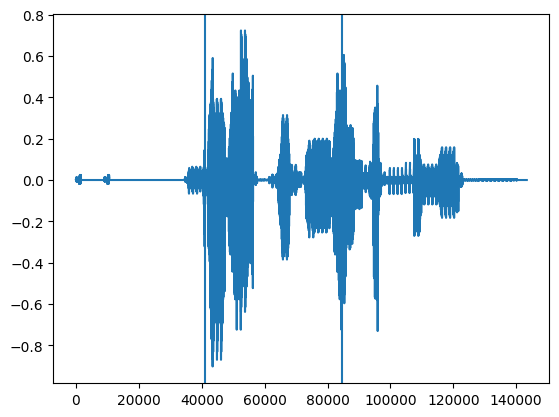

In [55]:
plt.plot(wavs)
plt.axvline(2.560*16000)
plt.axvline(5.280*16000)

In [56]:
ipd.display(ipd.Audio(wavs[:], rate=16000))

In [24]:
import soundfile as sf

In [57]:
sf.write('example_noncollapse_expandby5.wav',wavs,16000)# samplerate)


In [64]:
emission_lens = [len(u) for u in multistreamer.streamers[0].unit_history]

In [58]:
multistreamer.streamers[0].unit_history

[[71],
 [],
 [],
 [],
 [],
 [],
 [],
 [71],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [71],
 [36, 36, 36, 36, 36],
 [36],
 [36, 36],
 [7],
 [],
 [87],
 [87, 97, 97, 97],
 [],
 [],
 [70, 70, 70, 70, 70],
 [70, 14],
 [14],
 [14],
 [24, 24, 61, 61, 61, 61],
 [],
 [61, 61],
 [43],
 [2],
 [2, 2],
 [63],
 [31],
 [31, 31],
 [23],
 [62],
 [],
 [1],
 [],
 [66],
 [21],
 [21, 98, 98, 98],
 [],
 [69, 69],
 [],
 [69],
 [],
 [70, 70],
 [70, 14],
 [14],
 [76],
 [94, 94, 94, 32, 32, 32],
 [],
 [64],
 [64],
 [75, 75, 75],
 [75],
 [75, 33],
 [91, 91, 91, 91, 91],
 [91, 43, 43],
 [43, 43],
 [74, 2, 63, 63, 47],
 [],
 [],
 [],
 [47],
 [],
 [],
 [23, 42, 42, 42, 42],
 [],
 [42],
 [42],
 [],
 [],
 [80],
 [80],
 [],
 [],
 [88],
 [81, 81, 81, 81, 81, 81],
 [83, 83, 83, 83],
 [83],
 [83],
 [83],
 [20, 20, 20],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [65]:
16000*6.4

102400.0

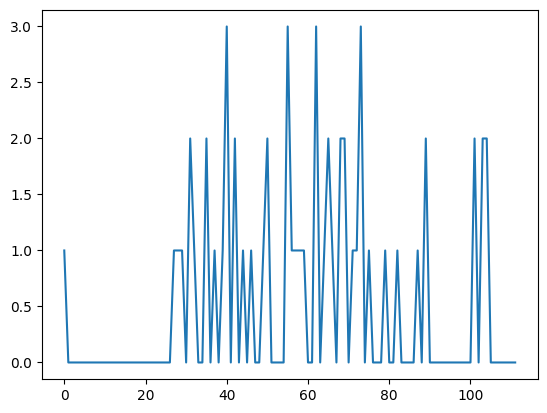

In [28]:
plt.plot(emission_lens)

In [12]:
gt_expanded=np.array([71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71,
        71, 71, 71, 12, 12, 49, 36, 36, 36, 36,  7, 87, 87, 87, 87, 68, 97, 97,
        97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 19, 19, 19, 70, 70, 70, 70,
        70, 70, 14, 14, 14, 14, 14, 14, 14, 76, 76, 76, 76, 76, 76, 76, 76,  9,
         9,  9,  9,  9,  9,  9,  9,  9, 74, 74, 74, 74, 74, 74,  2,  2,  2,  2,
        57, 57, 31, 23, 23, 23, 23, 23, 23, 23, 69, 69, 69, 69, 69, 69, 69, 69,
        69, 64, 11, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 69, 69,
        69, 69, 69, 69, 69, 69, 16, 16, 16, 16, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 87, 87, 94, 94, 94, 94, 94, 94, 94, 32, 32,
        32, 64, 27, 89, 89, 33, 33, 24, 24, 17, 17, 61, 61, 61, 17, 17, 17, 17,
        97, 97, 97, 97, 97, 97, 97, 97, 73, 73, 73, 73, 16, 16, 16, 66, 66, 77,
        77, 77, 77, 77, 77, 87, 87, 87, 87, 38, 38, 42, 42, 42, 81, 81, 81, 81,
         2,  2,  2,  2,  2,  2,  2, 57, 31, 29, 41, 41, 41, 41, 41, 41, 41, 84,
        22, 22, 20, 20, 57, 57, 57, 20, 20, 20, 20, 20])